# Introduction to neural network classification with TensorFlow

A classification is where you try yo classify something as on thing or another.

A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 10000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [2]:
# Check the features
X

array([[ 0.0464692 ,  0.82477834],
       [ 1.00506323, -0.43335153],
       [-0.58348442,  0.79452834],
       ...,
       [ 0.6854581 ,  0.37297955],
       [ 0.47440334,  0.88491997],
       [-0.67440999,  0.26094865]])

In [3]:
# Check the labels
y

array([1, 0, 0, ..., 1, 0, 1])

The data is a little hard to understand right now... let´s visualize it.

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0
...,...,...,...
9995,0.505764,0.662722,1
9996,0.790650,0.218306,1
9997,0.685458,0.372980,1
9998,0.474403,0.884920,0


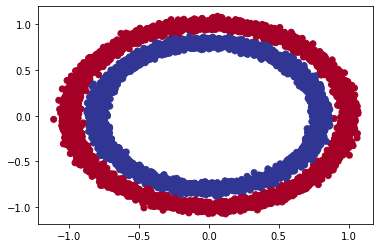

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [6]:
# Check the shape of our features and labels
X.shape, y.shape

((10000, 2), (10000,))

In [7]:
X[:10], y[:10]

(array([[ 0.0464692 ,  0.82477834],
        [ 1.00506323, -0.43335153],
        [-0.58348442,  0.79452834],
        [ 0.98478298, -0.32517879],
        [ 0.82993028, -0.54722305],
        [-0.13392877,  0.77624858],
        [ 0.77919743,  0.64581132],
        [ 0.72295477,  0.17383084],
        [-0.12180665,  0.79695076],
        [ 0.84952936,  0.50567829]]), array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0]))

In [8]:
# How many samples we're working with
len(X), len(y)

(10000, 10000)

In [9]:
# View the first example of features and labels
X[10], y[10]

(array([-0.92287711, -0.31288882]), 0)

## Steps in modelling
First try

In [10]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)
len(X), len(X_train), len(X_test)

(10000, 8000, 2000)

In [11]:
import tensorflow as tf

# Build a neural network to fit the data
tf.random.set_seed(42)

# 1. Create a model
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", mode="min", patience=10)
first_model = tf.keras.Sequential([
  tf.keras.Input(shape = 2),
  tf.keras.layers.Dense(100, activation = "relu"),
  #tf.keras.layers.Dense(100),
  #tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
first_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])

# 3. Fit the model
history = first_model.fit(X_train, y_train, 
                          #X, y,
                          epochs=10000, callbacks=[callback])

# 4. Evaluate the model
first_model.evaluate(X_test, y_test)

Epoch 1/10000
250/250 [==============================] - 2s 4ms/step - loss: 0.6949 - accuracy: 0.4976
Epoch 2/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6863 - accuracy: 0.4974
Epoch 3/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6789 - accuracy: 0.5045
Epoch 4/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6699 - accuracy: 0.5665
Epoch 5/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6591 - accuracy: 0.7505
Epoch 6/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6468 - accuracy: 0.8911
Epoch 7/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6333 - accuracy: 0.9345
Epoch 8/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6191 - accuracy: 0.9621
Epoch 9/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6037 - accuracy: 0.9799
Epoch 10/10000
250/250 [==============================] - 1s 4ms/step - l

[0.5448473691940308, 0.9990000128746033]

Text(0.5, 0, 'epochs')

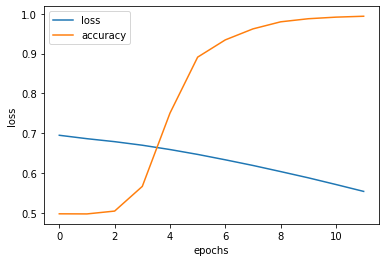

In [12]:
# Plot history
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [13]:
# Save the model
first_model.save("binary_classification_model.h5")

In [14]:
# Download the model from Google Colab
from google.colab import files
files.download("/content/binary_classification_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model 
model_2.fit(X, y,epochs=5)

Epoch 1/5
313/313 [==============================] - 2s 3ms/step - loss: 0.8730 - accuracy: 0.4962
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 0.6938 - accuracy: 0.4964
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 0.6939 - accuracy: 0.4960
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.5015
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.6938 - accuracy: 0.4997


In [16]:
# Lets try and improve our model by training for longer..
model_2.fit(X, y, epochs=200)
model_2.evaluate(X, y)

Epoch 1/200
313/313 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.4958
Epoch 2/200
313/313 [==============================] - 1s 4ms/step - loss: 0.6938 - accuracy: 0.4954
Epoch 3/200
313/313 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.4960
Epoch 4/200
313/313 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5015
Epoch 5/200
313/313 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.4997
Epoch 6/200
313/313 [==============================] - 1s 2ms/step - loss: 0.6940 - accuracy: 0.4953
Epoch 7/200
313/313 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4883
Epoch 8/200
313/313 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4974
Epoch 9/200
313/313 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.4977
Epoch 10/200
313/313 [==============================] - 1s 2ms/step - loss: 0.6940 - accura

[0.6936948299407959, 0.5004000067710876]

Since we're working on a binary classification problem and our model is getting around 50% accuaracy... it's performing as it's guessing 🇸

Try to add an extra layer?

In [17]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model, with 2 layers
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7659 - accuracy: 0.5057
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.4978
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.4989
Epoch 4/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5024
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5007
Epoch 6/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5011
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.4919
Epoch 8/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4893
Epoch 9/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5031
Epoch 10/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6937 - accura

In [18]:
# 4. Evaluate the model(ON THE SAME DATA WE TRAINED ON, BIG NO-NO)
model_3.evaluate(X, y)

313/313 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932647824287415, 0.5]

In [19]:
# There are 5K of each color, not that good neural network :P
circles["label"].value_counts()

1    5000
0    5000
Name: label, dtype: int64

## Improving our model

1. Create a model - more layers and hidden units
2. Compile a model - choose a diffirent optimization function
3. Fitting a model - more epochs

## Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [20]:
# Set random seed
tf.random.set_seed(42)

# 1. Create te model
model_4 =  tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]    
)

# 3. Fit the model
model_4.fit(X, y, epochs=100)

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.9536 - accuracy: 0.4919
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5005
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4941
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.4923
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.5028
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.4941
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.4926
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6969 - accuracy: 0.4978
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.5006
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6969 - accura

In [21]:
# 4. Evaluate the model, NOT IDEAL TO EVALUATE ON THE SAME DATASET WE'RE TRAINING ON.. :P
model_4.evaluate(X, y)

313/313 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934003829956055, 0.5]

To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in trained model, features (X) and labels (y)
* Create a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)




In [22]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


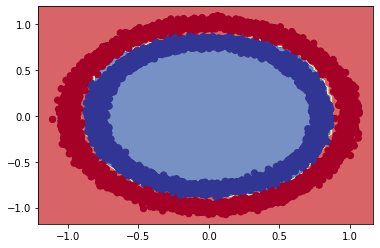

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(first_model, X, y)  


In [24]:
# Let's see if out model can be used for a regresion problem.

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X +100 (Thats the relationship between X and Y)

# Split the regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data

We are working on a regression problem

To compile the model we need to re-write `model_4` since its for a binary classification problem


In [25]:
# Random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

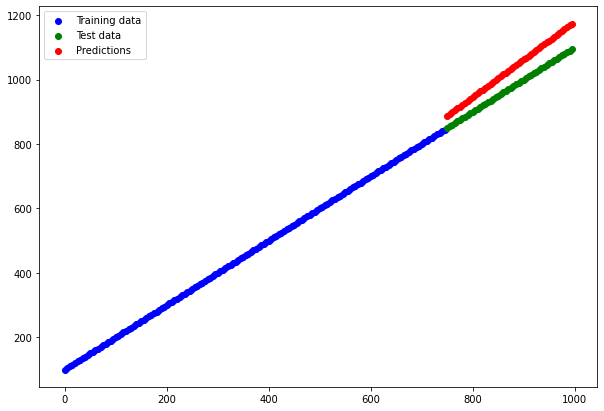

In [26]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [27]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)                           
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy, # or as string "binary_crossentropy"
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(#tf.expand_dims(X, axis=-1), y, epochs=100)
                      X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 3.9494 - accuracy: 0.4284
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 2.4893 - accuracy: 0.4431
Epoch 3/100
313/313 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.4549
Epoch 4/100
313/313 [==============================] - 0s 2ms/step - loss: 0.7600 - accuracy: 0.4607
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7299 - accuracy: 0.4659
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7125 - accuracy: 0.4706
Epoch 7/100
313/313 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.4733
Epoch 8/100
313/313 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4778
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4788
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4834
E

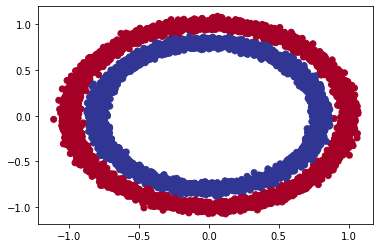

In [28]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu); # cm = ColorMap

doing binary classifcation...


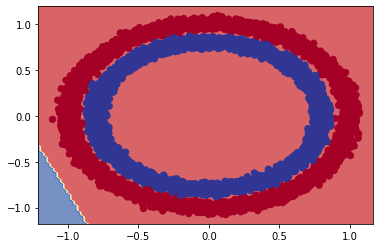

In [29]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [30]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)                               
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 3.9494 - accuracy: 0.4284
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 2.4893 - accuracy: 0.4431
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.8189 - accuracy: 0.4549
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7600 - accuracy: 0.4607
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7299 - accuracy: 0.4659
Epoch 6/100
313/313 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.4706
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.7027 - accuracy: 0.4733
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6974 - accuracy: 0.4778
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4788
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4834
E

## Test own variant

In [31]:
#Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_playground = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation=tf.keras.activations.tanh),
  tf.keras.layers.Dense(8, activation=tf.keras.activations.tanh),
  #tf.keras.layers.Dense(2, activation=tf.keras.activations.tanh), 
  #Should be one neuron in output layer since its a binary classification problem
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) #Activation in output layer for binary classification                             
])

# 2. Compile the model
model_playground.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_playground.fit(X, y, 
                               #epochs=1000)
                               epochs=250)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 0.7051 - accuracy: 0.5050
Epoch 2/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5266
Epoch 3/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5596
Epoch 4/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6873 - accuracy: 0.5793
Epoch 5/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6810 - accuracy: 0.6537
Epoch 6/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6701 - accuracy: 0.6801
Epoch 7/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6530 - accuracy: 0.8119
Epoch 8/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6253 - accuracy: 0.8462
Epoch 9/250
313/313 [==============================] - 1s 2ms/step - loss: 0.5872 - accuracy: 0.9108
Epoch 10/250
313/313 [==============================] - 1s 2ms/step - loss: 0.5419 - accuracy: 0.9442
E

In [32]:
# Evaluate
model_playground.evaluate(X, y)

313/313 [==============================] - 1s 2ms/step - loss: 6.1892e-04 - accuracy: 0.9999


[0.0006189190316945314, 0.9998999834060669]

doing binary classifcation...


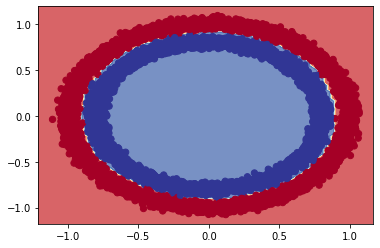

In [33]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_playground,
                       X=X,
                       y=y)

In [34]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# Build the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  # Add a layer(output) for binary classification
  tf.keras.layers.Dense(1, activation="sigmoid")            
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_7.fit(X, y, 
                      #epochs=100)
                      epochs=250)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 0.6805 - accuracy: 0.5317
Epoch 2/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6730 - accuracy: 0.5588
Epoch 3/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6664 - accuracy: 0.5636
Epoch 4/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6592 - accuracy: 0.5767
Epoch 5/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6460 - accuracy: 0.6003
Epoch 6/250
313/313 [==============================] - 1s 2ms/step - loss: 0.6219 - accuracy: 0.6858
Epoch 7/250
313/313 [==============================] - 1s 2ms/step - loss: 0.5770 - accuracy: 0.7578
Epoch 8/250
313/313 [==============================] - 1s 2ms/step - loss: 0.5059 - accuracy: 0.8630
Epoch 9/250
313/313 [==============================] - 1s 2ms/step - loss: 0.4118 - accuracy: 0.9629
Epoch 10/250
313/313 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.9817
E

In [35]:
# Evaluate the model
model_7.evaluate(X, y)

313/313 [==============================] - 1s 1ms/step - loss: 0.0136 - accuracy: 0.9949


[0.013585487380623817, 0.9948999881744385]

doing binary classifcation...


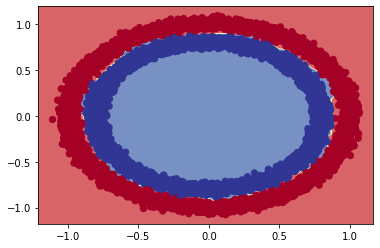

In [36]:
# How does our model predictions look?
plot_decision_boundary(model_7, X, y)

🤔 **Question:** Whats wrong with the predictions we've made? Are the model really evaluated correctly?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

### Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [37]:
# Create a toy tensor (similar to the data we pass into our models)

import tensorflow as tf

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

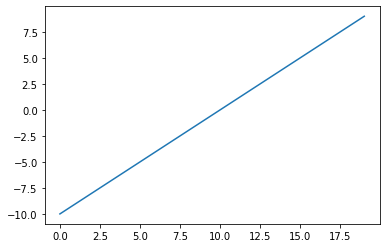

In [38]:
# Visualize our toy tensor
plt.plot(A)

In [39]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

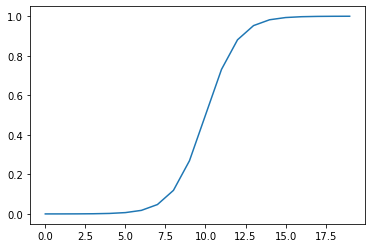

In [40]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [41]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

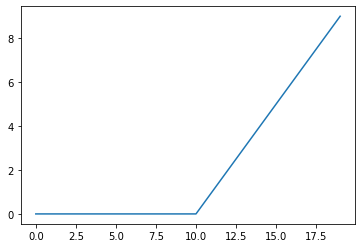

In [42]:
# Plot our toy tensor transformed by relu
plt.plot(relu(A))

In [43]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

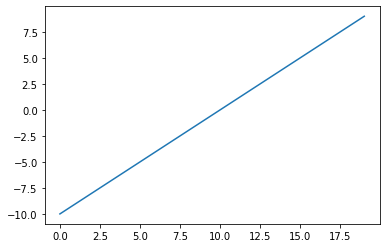

In [44]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [45]:
# Any changes at all?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [46]:
# Let's recreate the Tanh function
def tanh(x):
	return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
 
# Pass in our toy tensor
tanh(A)

array([-1.        , -1.        , -0.9999998 , -0.99999845, -0.9999877 ,
       -0.9999091 , -0.9993293 , -0.9950547 , -0.9640275 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640275 ,  0.9950547 ,  0.9993293 ,
        0.9999091 ,  0.9999877 ,  0.99999845,  0.9999998 ,  1.        ],
      dtype=float32)

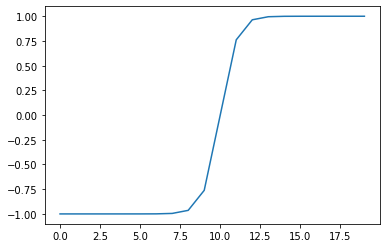

In [47]:
# Plot our toy tensor transformed by Tanh
plt.plot(tanh(A))

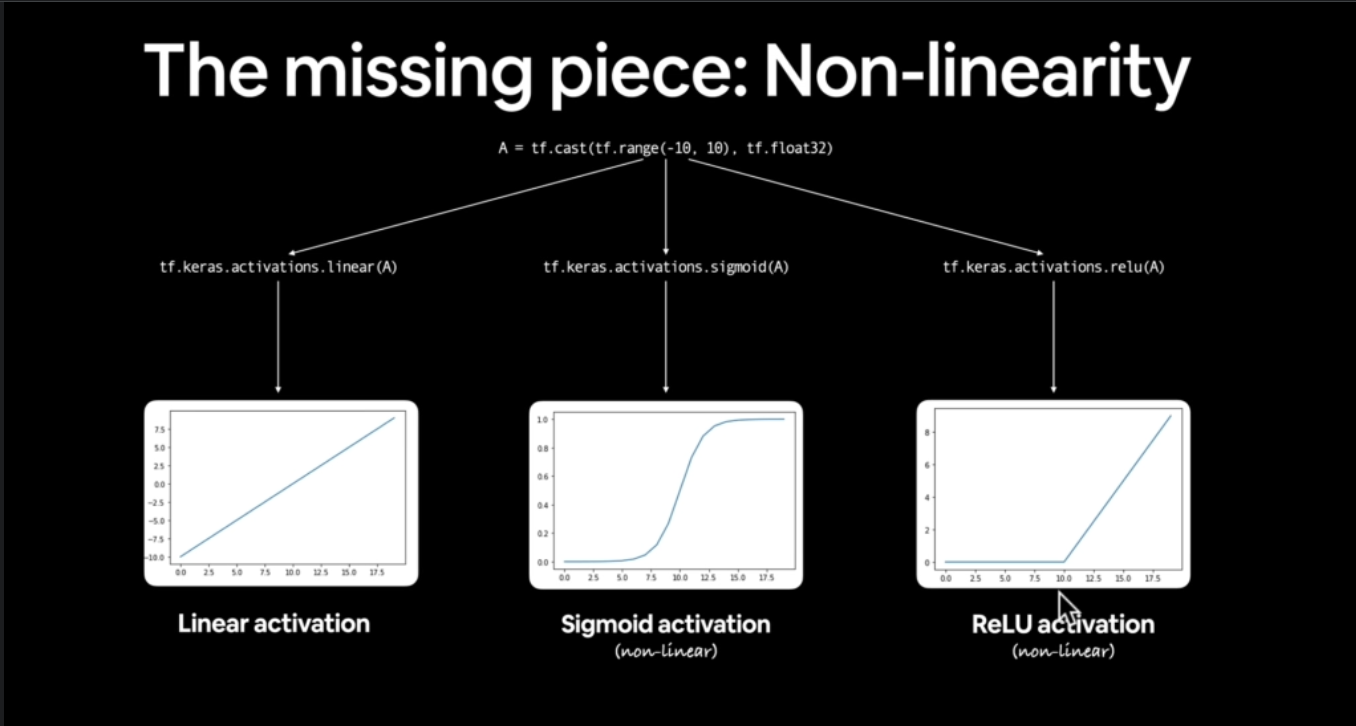

Neural networks uses a combination of linear and non-linear activations to find patterns in data.

### Evaluating and improving our classification

So far ew've been training and testing on the same dataset..

**Big NO NO in machine learning**

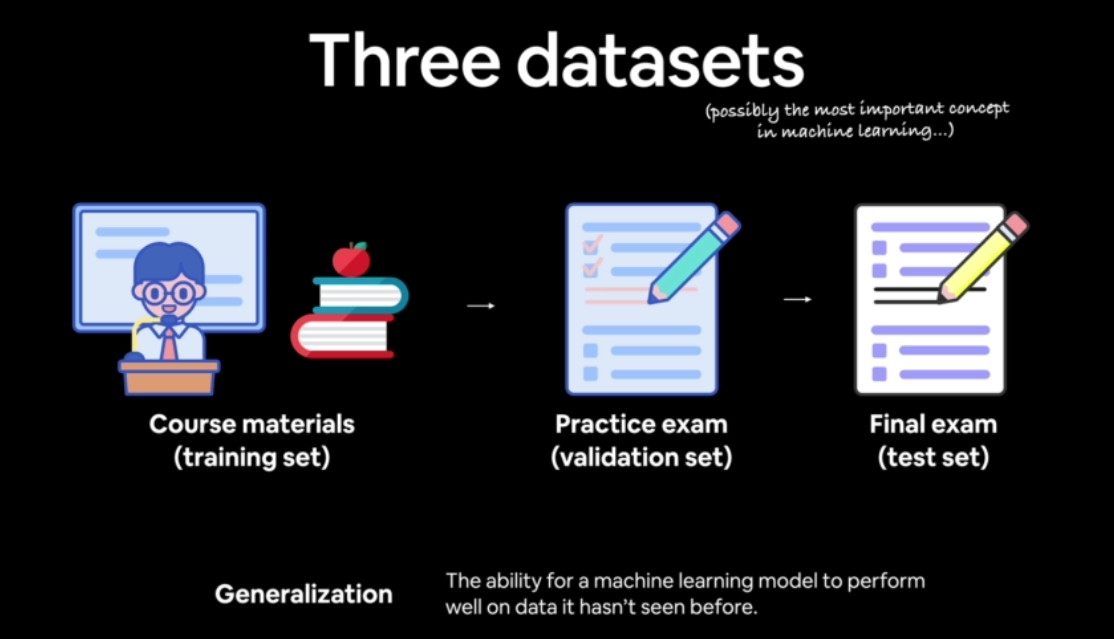


In [48]:
# Create a training and test set
# Check how many examples we have

len(X)

10000

In [49]:
# Split into train and test sets
X_train, y_train = X[:8000], y[:8000] # 80% training samples, first 8k samples
X_test, y_test = X[8000:], y[8000:] # 20%, last 2K samples

# Check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

In [50]:
# Let's create a model to fit on the training data and evaluate on the test data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # Increased by 10 times from previous model
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 2ms/step - loss: 0.6539 - accuracy: 0.6060
Epoch 2/25
250/250 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8786
Epoch 3/25
250/250 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.9875
Epoch 4/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9909
Epoch 5/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9944
Epoch 6/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9931
Epoch 7/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9937
Epoch 8/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9946
Epoch 9/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9941
Epoch 10/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9931
Epoch 11/2

In [51]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9890


[0.023463428020477295, 0.9890000224113464]

doing binary classifcation...
doing binary classifcation...


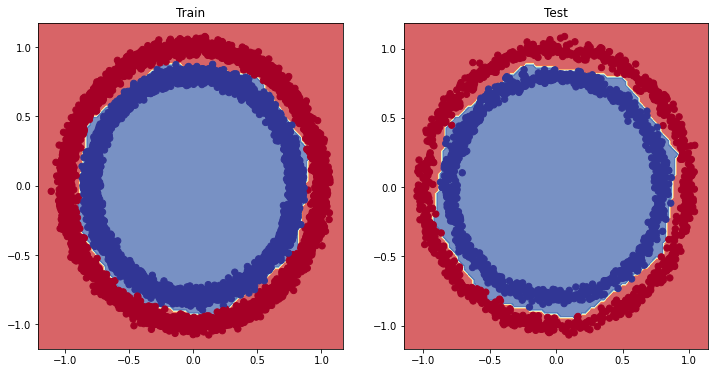

In [52]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1) #Rows, Colums, The first value
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2) #Rows, Colums, The second plot
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [53]:
history.history

{'accuracy': [0.6060000061988831,
  0.8786249756813049,
  0.987500011920929,
  0.9908750057220459,
  0.9943749904632568,
  0.9931250214576721,
  0.9937499761581421,
  0.9946249723434448,
  0.9941250085830688,
  0.9931250214576721,
  0.9936249852180481,
  0.9934999942779541,
  0.9928749799728394,
  0.9955000281333923,
  0.9940000176429749,
  0.9936249852180481,
  0.9925000071525574,
  0.9946249723434448,
  0.9940000176429749,
  0.9940000176429749,
  0.9953749775886536,
  0.9929999709129333,
  0.9940000176429749,
  0.9926249980926514,
  0.9936249852180481],
 'loss': [0.6539056897163391,
  0.36739861965179443,
  0.10284443944692612,
  0.05290163680911064,
  0.0329742506146431,
  0.02739671617746353,
  0.024848969653248787,
  0.021388519555330276,
  0.020063024014234543,
  0.019906554371118546,
  0.021084660664200783,
  0.0195649191737175,
  0.018375743180513382,
  0.014925346709787846,
  0.016957448795437813,
  0.01810278184711933,
  0.02044244110584259,
  0.014878746122121811,
  0.015512

In [54]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.653906,0.606000
1,0.367399,0.878625
2,0.102844,0.987500
3,0.052902,0.990875
4,0.032974,0.994375
5,0.027397,0.993125
6,0.024849,0.993750
7,0.021389,0.994625
8,0.020063,0.994125
9,0.019907,0.993125


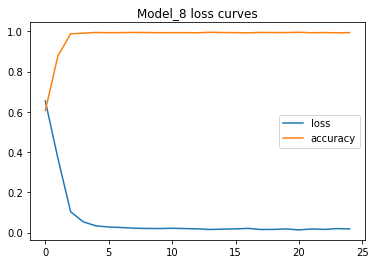

In [55]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

🔑**Note:** The loss is how wrong our model is. For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can thnk of a callback as an extra piece of functionality, you can add to your model *while* it's training.
* Another model
* A modified loss curves plot.

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # Increase the lr by 10 to the power of epoch divided by 20 every epoch

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs= 100, callbacks=[lr_scheduler]) # lr comes as a list

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5090 - lr: 1.0000e-04
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5156 - lr: 1.1220e-04
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5264 - lr: 1.2589e-04
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5259 - lr: 1.4125e-04
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5330 - lr: 1.5849e-04
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5360 - lr: 1.7783e-04
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5396 - lr: 1.9953e-04
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.5436 - lr: 2.2387e-04
Epoch 9/100
250/250 [==============================] - 0

##"*If in doubt, code it out"* - ^^

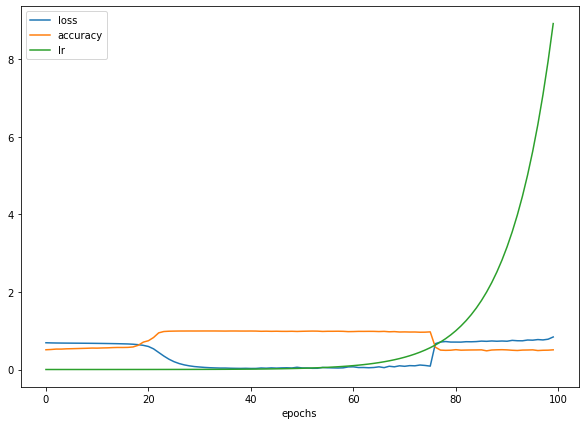

In [57]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

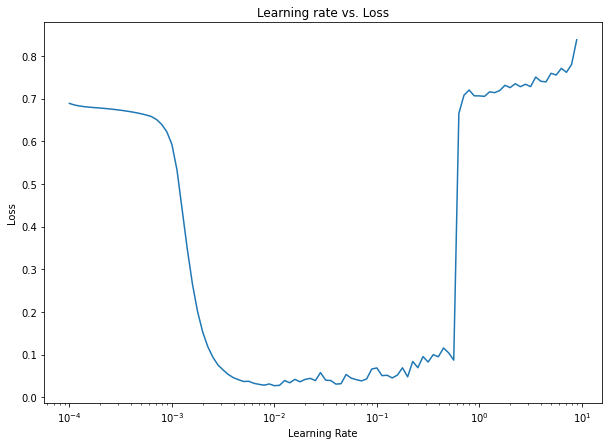

In [58]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10** (tf.range(100)/20))
#lrs
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

## The ideal Learning rate is about ten times smaller than the lowest point on the curve

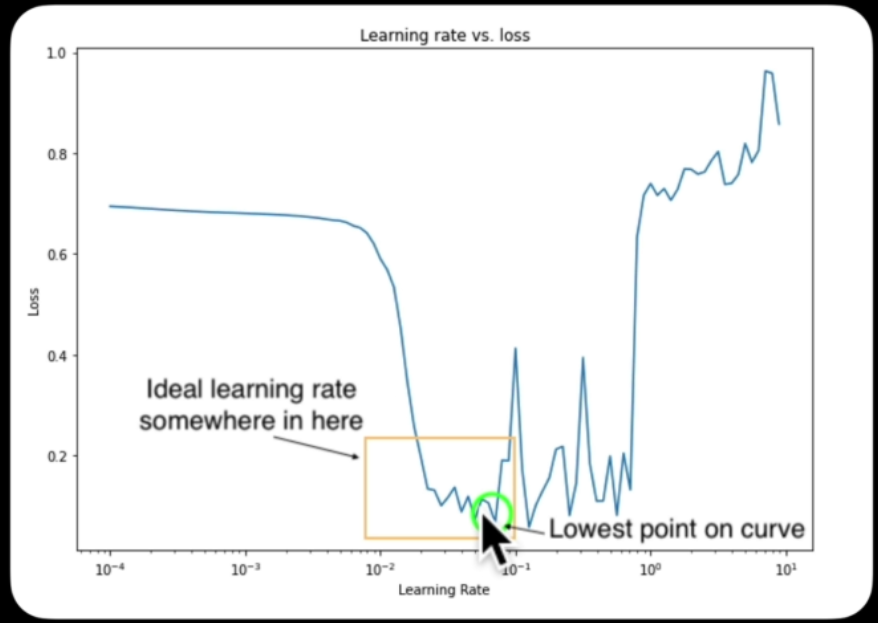

In [59]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [60]:
len(lrs)

100

In [64]:
# Let's try using a higher *ideal* learning rate with the same model

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(lr=0.02),
                  metrics=["accuracy"])

# Fit the model for 20 epochs ( 5 less than the previous)

history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


250/250 [==============================] - 1s 2ms/step - loss: 0.5292 - accuracy: 0.7308
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9935
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9918
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9929
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9921
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9843
Epoch 8/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9927
Epoch 9/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9945
Epoch 10/20
250/250 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9910
Epoch 11/2

In [65]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

63/63 [==============================] - 1s 5ms/step - loss: 0.0110 - accuracy: 0.9950


[0.010959010571241379, 0.9950000047683716]

In [66]:
# Evaluate model_8 on the test dataset
model_8.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9890


[0.023463428020477295, 0.9890000224113464]

doing binary classifcation...
doing binary classifcation...


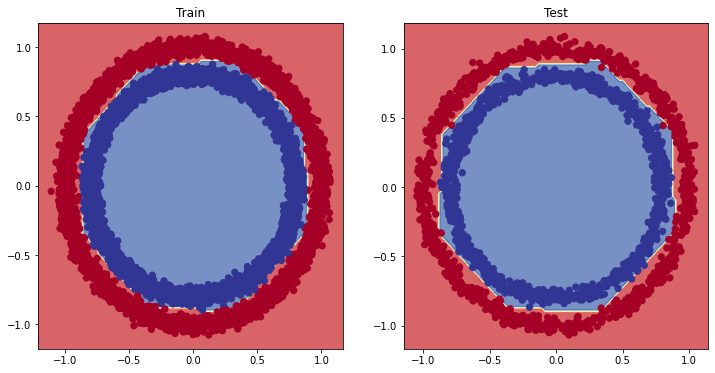

In [70]:
# Pot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()